#### Analyses of CU/Psychopathic trait subgroup for latent variable modeling systematic review

Updated with Winters (2025 study)

This document includes all analyses that I did for the Poster Presentation at the SSSP ECE 2025. 

1. study descriptives (years, models, breakdwon of variables and scales), including sankey plots
2. chi square/contingency table tests for differences in these groups
3. analyses of most frequent models (LPA/LCA; EFA/CFA/SEM; growth models) and the use of variables (directionalities)



In [1]:
### read in data and activate the environmentimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import plotly.graph_objects as go

#setting wd to where the data is
import os
os.chdir('C:/Users/U727148/Desktop/DATA/REVIEW/')
#reading in data
df = pd.read_excel('updated_from_cleaned_20250423.xlsx')
#checking the data
print(df.head())



   Unnamed: 0.1  Unnamed: 0  index  \
0           NaN         NaN      1   
1           0.0         0.0      2   
2           1.0         1.0      3   
3           2.0         2.0      4   
4           3.0         3.0      5   

                                                name   f_author  year  \
0  Executive function and underlying brain networ...    Winters  2025   
1  A latent class analysis of cognitive-affective...  Ciesenski  2024   
2  The Inventory of Callous-Unemotional Traits (I...       Kemp  2024   
3  Callous-unemotional traits moderate the associ...   Castagna  2024   
4  Cognitive and social-cognitive factors as medi...       Cohn  2024   

                                         all_authors  \
0  Drew Winters, Jules Dugré, Joseph Sakai, R. Mc...   
1  Ciesinski, Nicole K.; Mccloskey, Michael S.; C...   
2  Emily C. Kemp, James V. Ray, Paul J. Frick, La...   
3  Peter J. Castagna, Dara E. Babinski, Daniel A....   
4                 Jonathan R. Cohn & David C. Cicero

In [2]:
#making the mean age
df['age_mean_numeric'] = pd.to_numeric(df['age_mean'], errors='coerce')
mean_age = df['age_mean_numeric'].mean()
mean_age_weighted = (df['age_mean_numeric'] * df['sample_size']).sum() / df['sample_size'].sum()
print("Mean age of the sample: ", mean_age) 
print("Weighted mean age of the sample: ", mean_age_weighted) #17.76


Mean age of the sample:  20.83530985915493
Weighted mean age of the sample:  17.759201942220958


In [3]:
#average sample size
#summing the sample size for each dataset
unique_studies = df[df["Name_dataset"].isna()]["sample_size"].sum()
grouped_sample_size = df.groupby("Name_dataset")["sample_size"].max().sum()
total_sample_size = unique_studies + grouped_sample_size
print("Summed sample: ", df['sample_size'].sum()) # 123,000
print("Total sample size of the review (studies removed that were used multiple times): ", total_sample_size)
average_sample_size = total_sample_size / 79
print("Average sample size of the review: ", average_sample_size)

Summed sample:  73833
Total sample size of the review (studies removed that were used multiple times):  62622
Average sample size of the review:  792.6835443037975


In [4]:
#Gender distributions
df['gender_percent_female'].value_counts() #24 all male studies, 3 all female studies
mean_gender_distribution = df['gender_percent_female'].mean()
mean_gender_distribution_weighted = (df['gender_percent_female'] * df['sample_size']).sum() / df['sample_size'].sum()
print('Mean gender distribution: on average ',  mean_gender_distribution, ' per cent female participants')
print('Mean gender distribution weighted by sample size: on average ', mean_gender_distribution_weighted, ' per cent female participants')

Mean gender distribution: on average  33.03911392405063  per cent female participants
Mean gender distribution weighted by sample size: on average  34.027835791583705  per cent female participants


--> overrepresentation of men but this likely represents a real difference in prevalence rates 

In [5]:
#Age average 
df['age_mean'].value_counts() # 3 studies with no age data
df['age_mean_numeric'] = pd.to_numeric(df['age_mean'], errors='coerce')

mean_age = df['age_mean_numeric'].mean()
mean_age_weighted = (df['age_mean_numeric'] * df['sample_size']).sum() / df['sample_size'].sum()
print('Mean age: on average ',  mean_age, ' years')
print('Mean age weighted by sample size: on average ', mean_age_weighted, ' years') #17.76


Mean age: on average  20.83530985915493  years
Mean age weighted by sample size: on average  17.759201942220958  years


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'name', 'f_author', 'year',
       'all_authors', 'journal', 'journal_5_y_if', 'Name_dataset',
       'region_dataset', 'dataset_notes', 'sample_size', 'age_range',
       'age_mean', 'age_SD', 'demographics', 'gender_percent_female',
       'institutional_sample', 'phenotypes', 'p_or_cu', 'assessment_tool',
       'assessment_type', 'place_in_model', 'cognitive_variable',
       'cognitive_assessment', 'cognitive_assessment_type',
       'behavioral_variable ', 'behavioral_assessment',
       'behavioral_assessment_type', 'brain_variable ', 'brain_assessment',
       'ROI', 'dummy_B_C_B', 'feature_predictors', 'design', 'goal',
       'general_model', 'model_in_text', 'other_analyses', 'groups',
       'outcome_comment', 'outcome_variable', 'directionality',
       'pred_intervall', 'outcome_variable.1', 'outcome_variable_value',
       'outcome_variable_value_p', 'substance_use', 'substance ',
       'comorbidity', 'comorbidity_type',
   

In [7]:
#make an overview of sample types
df['institutional_sample'].value_counts() 
#print percentages of each sample type
print("% of institutional samples: ", df['institutional_sample'].value_counts(normalize=True)[1] * 100) # 37.97
print("% of non-institutional samples: ", df['institutional_sample'].value_counts(normalize=True)[0] * 100) #60.75



% of institutional samples:  37.9746835443038
% of non-institutional samples:  60.75949367088608


In [8]:
df_institutional = df[df['institutional_sample'] == 1]
df_institutional['gender_percent_female'].value_counts()

gender_percent_female
0.0      16
100.0     2
41.5      1
47.7      1
19.4      1
23.3      1
42.5      1
42.6      1
10.0      1
57.6      1
29.6      1
47.2      1
17.2      1
24.1      1
Name: count, dtype: int64

In [9]:
df['design'].value_counts()


design
cross sectional    37
psychometric       17
longitudinal       17
experimental        8
Name: count, dtype: int64

In [10]:

#print percentages of each design type
print("% of cross-sectional studies: ", df['design'].value_counts(normalize=True)[0] * 100) # 49.37
print("% of longitudinal studies: ", df['design'].value_counts(normalize=True)[1] * 100) # 21.52
print("% of psychometric studies: ", df['design'].value_counts(normalize=True)[2] * 100) # 18.99
print("% of experimental studies: ", df['design'].value_counts(normalize=True)[3] * 100) # 10.13


% of cross-sectional studies:  46.835443037974684
% of longitudinal studies:  21.518987341772153
% of psychometric studies:  21.518987341772153
% of experimental studies:  10.126582278481013


C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\2384780223.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of cross-sectional studies: ", df['design'].value_counts(normalize=True)[0] * 100) # 49.37
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\2384780223.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of longitudinal studies: ", df['design'].value_counts(normalize=True)[1] * 100) # 21.52
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\2384780223.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

In [11]:
#looking at cross-sectional studies only
df_cross = df[df['design'] == ('cross sectional')]
df_cross['goal'].value_counts() # 3 studies with no goal data

goal
structure                 29
structure; association     5
association                2
brain structure            1
Name: count, dtype: int64

In [12]:
#looking at cross-sectional studies only
df_psych = df[df['design'] == ('psychometric')]
df_psych['goal'].value_counts() # 3 studies with no goal data

goal
validation                       7
structure                        5
structure; association           2
scale development; validation    1
structure; validation            1
association                      1
Name: count, dtype: int64

In [13]:
df_psych['general_model'].value_counts() # 3 studies with no model data 

general_model
factor analysis                                                                12
factor analysis; latent class analysis                                          2
principal component analysis; factor analysis; latent class analysis            1
factor analysis; principal component analysis; structural equation modeling     1
structural equation modeling                                                    1
Name: count, dtype: int64

In [14]:
df_long = df[df['design'] == ('longitudinal')]
df_long['goal'].value_counts() # 3 studies with no goal data


goal
development                9
structure                  4
prediction                 3
prediction; development    1
Name: count, dtype: int64

In [15]:

df_long['general_model'].value_counts()

general_model
growth model                    11
latent class analysis            5
structural equation modeling     1
Name: count, dtype: int64

In [16]:
df_exp = df[df['design'] == ('experimental')]
df_exp['goal'].value_counts()

goal
association                    4
cu traits as mediator          1
reward learning differences    1
brain structure                1
structure                      1
Name: count, dtype: int64

In [17]:
df_exp['general_model'].value_counts() 

general_model
fMRI task                 5
computational modeling    2
factor analysis           1
Name: count, dtype: int64

In [18]:
df_institutional['general_model'].value_counts() 
#make noninstitutional df
df_noninstitutional = df[df['institutional_sample'] == 0]


In [19]:

#calculate percentage of designs in both samples:
print("% of cross-sectional studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[0] * 100) # 49.37
print("% of longitudinal studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[1] * 100) # 21.52
print("% of psychometric studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[2] * 100) # 18.99
print("% of experimental studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[3] * 100) # 10.13

print("% of cross-sectional studies in non-institutional samples: ", df_noninstitutional['design'].value_counts(normalize=True)[0] * 100) # 49.37
print("% of longitudinal studies in non-institutional samples: ", df_noninstitutional['design'].value_counts(normalize=True)[1] * 100) # 21.52
print("% of psychometric studies in non-institutional samples: ", df_noninstitutional['design'].value_counts(normalize=True)[2] * 100) # 18.99
print("% of experimental studies in non-institutional samples: ", df_noninstitutional['design'].value_counts(normalize=True)[3] * 100) # 10.13

#% of cross-sectional studies in institutional samples:  56.666666666666664
#% of longitudinal studies in institutional samples:  20.0
#% of psychometric studies in institutional samples:  16.666666666666664
#% of experimental studies in institutional samples:  6.666666666666667
#% of cross-sectional studies in non-institutional samples:  41.66666666666667
#% of longitudinal studies in non-institutional samples:  25.0
#% of psychometric studies in non-institutional samples:  20.833333333333336
#% of experimental studies in non-institutional samples:  12.5


% of cross-sectional studies in institutional samples:  56.666666666666664
% of longitudinal studies in institutional samples:  20.0
% of psychometric studies in institutional samples:  16.666666666666664
% of experimental studies in institutional samples:  6.666666666666667
% of cross-sectional studies in non-institutional samples:  41.66666666666667
% of longitudinal studies in non-institutional samples:  25.0
% of psychometric studies in non-institutional samples:  20.833333333333336
% of experimental studies in non-institutional samples:  12.5


C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\60852379.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of cross-sectional studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[0] * 100) # 49.37
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\60852379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of longitudinal studies in institutional samples: ", df_institutional['design'].value_counts(normalize=True)[1] * 100) # 21.52
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\60852379.py:4: FutureWarning: Series.__getitem__ treating keys as posit

In [20]:
df_institutional['general_model'].value_counts()

general_model
latent class analysis                                                   15
factor analysis                                                          5
computational modeling                                                   2
structural equation modeling                                             2
growth model                                                             2
factor analysis; latent class analysis                                   2
factor analysis; structural equation modeling; latent class analysis     1
clustering                                                               1
Name: count, dtype: int64

In [21]:
print("% of LCA studies in institutional samples: ", df_institutional['general_model'].value_counts(normalize=True)[0] * 100) # 49.37
print("% of FA in institutional samples: ", df_institutional['general_model'].value_counts(normalize=True)[1] * 100) # 21.52
print("% of modeling, SEM, growth model in institutional samples: ", df_institutional['general_model'].value_counts(normalize=True)[2] * 100) # 21.52

print("% of LCA in non-institutional samples: ", df_noninstitutional['general_model'].value_counts(normalize=True)[0] * 100) # 49.37
print("% of FA & growth models studies in non-institutional samples: ", df_noninstitutional['general_model'].value_counts(normalize=True)[1] * 100) # 21.52
print("% of SEM in non-institutional samples: ", df_noninstitutional['general_model'].value_counts(normalize=True)[3] * 100) # 18.99
print("% of fMRI task  in non-institutional samples: ", df_noninstitutional['general_model'].value_counts(normalize=True)[4] * 100) # 10.13

#% of LCA studies in institutional samples:  50.0
#% of FA in institutional samples:  16.666666666666664
#% of modeling, SEM, growth model in institutional samples:  6.666666666666664

#% of LCA in non-institutional samples:  29.166666666666668
#% of FA & growth models studies in non-institutional samples:  18.75
#% of SEM in non-institutional samples:  12.5
#% of fMRI task  in non-institutional samples:  10.4

% of LCA studies in institutional samples:  50.0
% of FA in institutional samples:  16.666666666666664
% of modeling, SEM, growth model in institutional samples:  6.666666666666667
% of LCA in non-institutional samples:  29.166666666666668
% of FA & growth models studies in non-institutional samples:  18.75
% of SEM in non-institutional samples:  12.5
% of fMRI task  in non-institutional samples:  10.416666666666668


C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\59232553.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of LCA studies in institutional samples: ", df_institutional['general_model'].value_counts(normalize=True)[0] * 100) # 49.37
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\59232553.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("% of FA in institutional samples: ", df_institutional['general_model'].value_counts(normalize=True)[1] * 100) # 21.52
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\59232553.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecat

In [22]:
#Variable types summaries! p/cu, cognitive, behavioral, and brain
#starting with p/cu
df['p_or_cu'].value_counts() 
#does this map onto the age of the sample? 
df['p_or_cu'].value_counts(normalize=True) # 60% p, 40% cu
#p_or_cu
#psychopathic traits               0.531646
#cu traits                         0.430380
# cu traits; psychopathic traits    0.037975
df['age_range'].value_counts(normalize=True) 
#adolescents                  0.291139
#adults                       0.240506
#children                     0.215190
#young adults                 0.126582
#children; adolescents        0.063291
#adolescents; young adults    0.037975
#young adults; adults         0.025316
# 12 percent mixed ages, these are the longitudinal studies
#there are 38% of studies with >18 participants, possibly up to 41% when considering the samples from the longitudinal studies
# however 53% of studies look at psychopathic traits! so there are a few studies that look at participants below 18 and yet call them psychopathic traits
#let's have a closer look at those studies
#filter by p_or_cu == 'psychopathic traits' and age_range == ['children', 'adolescents', 'children; adolescents']
df_filter = df[(df['p_or_cu'] == 'psychopathic traits') & (df['age_range'].isin(['children', 'adolescents', 'children; adolescents']))]
df_filter['assessment_tool']

19    Antisocial Process Screening Device (APSD)
30     Child Problematic Traits Inventory (CPTI)
46        Psychopathy Checklist: Revised (PCL-R)
48     Youth Psychopathic Traits Inventory (YPI)
50     Youth Psychopathic Traits Inventory (YPI)
52     Youth Psychopathic Traits Inventory (YPI)
73        Psychopathy Checklist: Revised (PCL-R)
74     Youth Psychopathic Traits Inventory (YPI)
78        Psychopathy Checklist: Revised (PCL-R)
Name: assessment_tool, dtype: object

Looking closer at the use of psychopathic traits in youth. 
1. Colins 2022: Specifically looks at the use of psychopathic rather than CU traits as a measure of recidivism prediction in detained girls. Specifically talk about putative psychopathic personality. Finding: PPP is not incrementally predictive of rearrests <18 years old above past arrests.
2. Lopez-Romero 2021: specifically looked at the viability of considering psychopathic as opposed to CU traits in youth
3. Waller 2019: used PCL-R youth version (factor 1/2 for prediction of behavior)
4. Colins 2018: used YPTI
5. Adjorlolo 2018: used YPTI
6. Dubas 2018: used YPTI
7. Kimonis 2011: used PCL-R youth version 
8. Nijhof 2011: used YPTI
9. Vitacco 2006: used PCL-R youth version

In [23]:
#Do people use different designs for p or cu traits? 
df_psychopathic = df[df['p_or_cu'] == 'psychopathic traits']
df_psychopathic['design'].value_counts() # 3 studies with no design data
df_psychopathic['design'].value_counts(normalize=True) # 3 studies with no design data

df_callous = df[df['p_or_cu'] == 'cu traits']
df_callous['design'].value_counts(normalize=True) # 3 studies with no design data



design
cross sectional    0.411765
longitudinal       0.264706
experimental       0.235294
psychometric       0.088235
Name: proportion, dtype: float64

In [24]:
df_psychopathic['design'].value_counts(normalize=True) 


design
cross sectional    0.547619
psychometric       0.309524
longitudinal       0.142857
Name: proportion, dtype: float64

In [25]:
df_psychopathic['general_model'].value_counts(normalize=True) 


general_model
latent class analysis                                                          0.404762
factor analysis                                                                0.261905
structural equation modeling                                                   0.142857
growth model                                                                   0.071429
factor analysis; latent class analysis                                         0.047619
factor analysis; principal component analysis; structural equation modeling    0.023810
factor analysis; structural equation modeling; latent class analysis           0.023810
clustering                                                                     0.023810
Name: proportion, dtype: float64

In [26]:
#Looking at how many studies reported multiple cognitive variables
#count entries by semicolon
df['behavioral_variable'].value_counts() # 3 studies with no cognitive variable data



behavioral_variable
aggression                                                                 13
externalizing behavior                                                     12
conduct problems                                                            9
criminal behavior                                                           9
aggression; externalizing behavior                                          4
criminal behavior; substance use                                            3
criminal behavior; externalizing behavior                                   2
criminal behavior; externalizing behavior; substance use                    2
aggression; substance use                                                   2
conduct problems; externalizing behavior                                    1
workplace deviance                                                          1
ADHD symptoms; substance use                                                1
criminal behavior; marijuana use            

In [27]:

df_callous['general_model'].value_counts(normalize=True) 

general_model
latent class analysis                                                   0.352941
growth model                                                            0.176471
fMRI task                                                               0.147059
factor analysis                                                         0.117647
computational modeling                                                  0.058824
structural equation modeling                                            0.058824
factor analysis; latent class analysis                                  0.029412
graph analysis                                                          0.029412
principal component analysis; factor analysis; latent class analysis    0.029412
Name: proportion, dtype: float64

Interesting! Seems like cross-sectional and psychometric designs are more common in studies investigating psychopathic traits.

In [28]:
df_psychopathic['cognitive_assessment_type'].value_counts(normalize=True) 


cognitive_assessment_type
self report     0.8125
experimental    0.1250
other report    0.0625
Name: proportion, dtype: float64

In [29]:

df_callous['cognitive_assessment_type'].value_counts(normalize=True) 


cognitive_assessment_type
experimental                  0.421053
self report                   0.263158
other report                  0.157895
self report; other report     0.052632
experimental; other report    0.052632
experimental; self report     0.052632
Name: proportion, dtype: float64

#cognitive_variable&callous value counts
#not assessed                                  16
#reward/punishment learning                     5
#impulsivity                                    3
#executive function                             2
#drift rate                                     1
#general cognitive ability                      1
#empathy                                        1
#Inhibition                                     1
#self control                                   1
#self control; impulsivity                      1
#executive function; impulsivity                1
#impulsivity; sensation seeking; aggression     1

#cog var and psychopathic value counts
#not assessed                                             28
#impulsivity                                               8
#self control                                              2
#executive function                                        2
#disinhibition                                             1
#empathy; self control; sensation seeking; impulsivity     1

types for callous: 
cognitive_assessment_type
experimental                  0.421053
self report                   0.263158
other report                  0.157895
self report; other report     0.052632
experimental; other report    0.052632
experimental; self report     0.052632

types for psychopathy: 
cognitive_assessment_type
self report     0.8125
experimental    0.1250
other report    0.0625


In [30]:
mean_qual_psychopathic = df_psychopathic['quality_score'].mean()
mean_qual_psychopathic_weighted = (df_psychopathic['quality_score'] * df_psychopathic['sample_size']).sum() / df_psychopathic['sample_size'].sum()
print('Mean quality score of psychopathic traits studies: ', mean_qual_psychopathic) # 4.5
print('Mean quality score of psychopathic traits studies weighted by sample size: ', mean_qual_psychopathic_weighted) # 4.5

Mean quality score of psychopathic traits studies:  16.547619047619047
Mean quality score of psychopathic traits studies weighted by sample size:  17.061748400852878


In [31]:
mean_qual_call = df_callous['quality_score'].mean()
mean_qual_call_weighted = (df_callous['quality_score'] * df_callous['sample_size']).sum() / df_callous['sample_size'].sum()
print('Mean quality score of cu traits studies: ', mean_qual_call) # 4.5
print('Mean quality score of cu traits studies weighted by sample size: ', mean_qual_call_weighted) # 4.5

Mean quality score of cu traits studies:  17.41176470588235
Mean quality score of cu traits studies weighted by sample size:  18.365441137177363


In [32]:
df_callous['behavioral_variable'].value_counts(normalize=True) # 3 studies with no design data

behavioral_variable
externalizing behavior                                                     0.242424
conduct problems                                                           0.242424
aggression                                                                 0.121212
aggression; externalizing behavior                                         0.090909
criminal behavior                                                          0.060606
conduct problems; externalizing behavior                                   0.030303
clinical diagnosis; externalizing behavior                                 0.030303
externalizing behavior; criminal behavior; ADHD symptoms; substance use    0.030303
conduct problems; criminal behavior; externalizing behavior                0.030303
ADHD symptoms; conduct problems                                            0.030303
criminal behavior; substance use                                           0.030303
clinical diagnosis; externalizing behavior; substance us

In [33]:
df_psychopathic['behavioral_variable'].value_counts(normalize=True) # 3 studies with no design data

behavioral_variable
aggression                                                              0.214286
criminal behavior                                                       0.166667
externalizing behavior                                                  0.071429
criminal behavior; substance use                                        0.047619
criminal behavior; externalizing behavior                               0.047619
criminal behavior; externalizing behavior; substance use                0.047619
aggression; substance use                                               0.047619
workplace deviance                                                      0.023810
criminal behavior; marijuana use                                        0.023810
behavioral inhibition; ASPD symptoms                                    0.023810
sexual violence                                                         0.023810
aggression; criminal behavior; externalizing behavior; substance use    0.023810
substanc

In [34]:
#explode the behavioral variable to get the different variables in the same column, stripping unnecessary spaces
df_psychopathic['behavioral_variable'] = df_psychopathic['behavioral_variable'].str.replace(' ', '') # remove spaces
df_psychopathic['behavioral_variable'] = df_psychopathic['behavioral_variable'].str.split(';')
df_psychopathic_exploded = df_psychopathic.explode('behavioral_variable')
df_psychopathic_exploded['behavioral_variable'].value_counts(normalize=True) # 3 studies with no design data


C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\1795043487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psychopathic['behavioral_variable'] = df_psychopathic['behavioral_variable'].str.replace(' ', '') # remove spaces
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\1795043487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psychopathic['behavioral_variable'] = df_psychopathic['behavioral_variable'].str.split(';')


behavioral_variable
criminalbehavior         0.281690
aggression               0.239437
substanceuse             0.183099
externalizingbehavior    0.126761
conductproblems          0.056338
prisonbehavior           0.028169
workplacedeviance        0.014085
riskysexualbehavior      0.014085
sexualviolence           0.014085
behavioralinhibition     0.014085
ASPDsymptoms             0.014085
marijuanause             0.014085
Name: proportion, dtype: float64

In [35]:
#explode the behavioral variable to get the different variables in the same column, stripping unnecessary spaces
df_callous['behavioral_variable'] = df_callous['behavioral_variable'].str.replace(' ', '') # remove spaces
df_callous['behavioral_variable'] = df_callous['behavioral_variable'].str.split(';')
df_call_exploded = df_callous.explode('behavioral_variable')
df_call_exploded['behavioral_variable'].value_counts(normalize=True) # 3 studies with no design data

C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\3497889203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callous['behavioral_variable'] = df_callous['behavioral_variable'].str.replace(' ', '') # remove spaces
C:\Users\U727148\AppData\Local\Temp\ipykernel_19920\3497889203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callous['behavioral_variable'] = df_callous['behavioral_variable'].str.split(';')


behavioral_variable
externalizingbehavior    0.333333
conductproblems          0.229167
aggression               0.145833
criminalbehavior         0.104167
substanceuse             0.083333
ADHDsymptoms             0.062500
clinicaldiagnosis        0.041667
Name: proportion, dtype: float64

In [36]:
df_psychopathic['brain_variable'].value_counts() # 3 studies with no design data

Series([], Name: count, dtype: int64)

Callous-Unemotional traits are way more likely to be studied with more neutral terms whereas psychopathy is most commonly studied in connection with aggression and criminal behavior

In [37]:
df_callous['brain_variable'].value_counts(normalize=True) # 3 studies with no design data

brain_variable
fMRI            0.666667
rs-fMRI         0.166667
fMRI in ROIs    0.166667
Name: proportion, dtype: float64

Studies investigating CU-traits are generally: higher in quality, more likely to have assessed cognitive variables and brain variables, more likely to have assessed *multiple* cognitive variables, WAY more likely to have assessed those variables experimentally and with multiple assessment types rather than with self report only (81% of psychopathy studies investigating cognitive variables assessed them using only self report vs only 26% of cu-trait studies).

In [38]:
#Now lets look at cognitive variables!
df['cognitive_variable'].value_counts() 



cognitive_variable
not assessed                                             47
impulsivity                                              11
reward/punishment learning                                5
executive function                                        4
self control                                              3
drift rate                                                1
disinhibition                                             1
general cognitive ability                                 1
empathy                                                   1
empathy; self control; sensation seeking; impulsivity     1
Inhibition                                                1
self control; impulsivity                                 1
executive function; impulsivity                           1
impulsivity; sensation seeking; aggression                1
Name: count, dtype: int64

In [39]:
\
#Exploding cognitive variables
df['cognitive_variable'] = df['cognitive_variable'].str.replace(' ', '') # remove spaces
df['cognitive_variable'] = df['cognitive_variable'].str.split(';')
df_exploded = df.explode('cognitive_variable')
df_exploded['cognitive_variable'].value_counts(normalize=True) # 3 studies with no design data


cognitive_variable
notassessed                  0.546512
impulsivity                  0.174419
executivefunction            0.058140
reward/punishmentlearning    0.058140
selfcontrol                  0.058140
empathy                      0.023256
sensationseeking             0.023256
driftrate                    0.011628
disinhibition                0.011628
generalcognitiveability      0.011628
Inhibition                   0.011628
aggression                   0.011628
Name: proportion, dtype: float64

In [40]:
\
#Exploding behav variables
df['behavioral_variable'] = df['behavioral_variable'].str.replace(' ', '') # remove spaces
df['behavioral_variable'] = df['behavioral_variable'].str.split(';')
df_exploded = df.explode('behavioral_variable')
df_exploded['behavioral_variable'].value_counts(normalize=True) # 3 studies with no design data

behavioral_variable
externalizingbehavior    0.219512
aggression               0.203252
criminalbehavior         0.203252
substanceuse             0.138211
conductproblems          0.130081
ADHDsymptoms             0.024390
prisonbehavior           0.016260
clinicaldiagnosis        0.016260
workplacedeviance        0.008130
riskysexualbehavior      0.008130
sexualviolence           0.008130
behavioralinhibition     0.008130
ASPDsymptoms             0.008130
marijuanause             0.008130
Name: proportion, dtype: float64

In [41]:

#Exploding brain variables
df['brain_variable'] = df['brain_variable'].str.replace(' ', '') # remove spaces
df['brain_variable'] = df['brain_variable'].str.split(';')
df_exploded = df.explode('brain_variable')
df_exploded['brain_variable'].value_counts(normalize=True) # 3 studies with no design data

brain_variable
fMRI          0.666667
rs-fMRI       0.166667
fMRIinROIs    0.166667
Name: proportion, dtype: float64

That is not surprising at all actually. 


In [42]:
df_callous['assessment_tool'].value_counts(normalize=True)

assessment_tool
Inventory of Callous-Unemotional Traits (ICU)                                                          0.529412
ABCD cu trait scale (SDQ/CBCL)                                                                         0.088235
Youth Psychopathic Traits Inventory (YPI)                                                              0.058824
Child Problematic Traits Inventory (CPTI)                                                              0.058824
Antisocial Process Screening Device (APSD)                                                             0.058824
Psychopathy Checklist: Revised (PCL-R)                                                                 0.029412
Proposed Specifiers for Conduct Disorder Scale (PSDC)                                                  0.029412
Psychopathy Checklist: Revised (PCL-R); Hurtful and Uncaring Behavior Scale (HUB)                      0.029412
Teacher Report Form Interpersonal Calloussness (TRF-IC); Self Report Psychopathy Scale (

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_lca_outcomes is your DataFrame
data = df_lca_outcomes['solution (no. of groups and distribution)'].value_counts()

# Define pastel colors
colors = ['#FFC1C1', '#FF6961', '#FFB2A7', '#FFDAC1', '#FF928B']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 20})


# Add a title
plt.title('Distribution of Number of Classes')

# Show the plot
plt.show()


NameError: name 'df_lca_outcomes' is not defined

In [ ]:

#Exploding psychopathic tools variables
df_psychopathic['assessment_tool'] = df_psychopathic['assessment_tool'].str.split('; ') 
df_Psych_exploded = df_psychopathic.explode('assessment_tool')
df_Psych_exploded['assessment_tool'].value_counts(normalize=True) 

C:\Users\U727148\AppData\Local\Temp\ipykernel_37752\2754170503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psychopathic['assessment_tool'] = df_psychopathic['assessment_tool'].str.split('; ')


assessment_tool
Psychopathy Checklist: Revised (PCL-R)                              0.228070
Self Report Psychopathy Scale (SRP)                                 0.157895
Youth Psychopathic Traits Inventory (YPI)                           0.122807
Levenson Self Report Psychopathy Rating scale (LSRP)                0.105263
Triarchic Psychopathy Measure (TriPM)                               0.087719
Psychopathic Personality Inventory (PPI)                            0.070175
Dark Triad Dirty Dozen                                              0.035088
Child Problematic Traits Inventory (CPTI)                           0.017544
Minnesota Temperament Inventory (MTI)                               0.017544
Psychopathic Personality Traits Scale (PPTS)                        0.017544
Comprehensive Assessment of Psychopathic Personality (CAPP)         0.017544
Minnesota Multiphasic Personality Inventory-Triarchic (MMPI-Tri)    0.017544
NEO Five-Factor Inventory (NEO-FFI)                         

In [ ]:

#Exploding callpus assessment tool variables
df_callous['assessment_tool'] = df_callous['assessment_tool'].str.split('; ') 
df_call_exploded = df_callous.explode('assessment_tool')
df_call_exploded['assessment_tool'].value_counts(normalize=True) 

C:\Users\U727148\AppData\Local\Temp\ipykernel_37752\1316207933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callous['assessment_tool'] = df_callous['assessment_tool'].str.split('; ')


assessment_tool
Inventory of Callous-Unemotional Traits (ICU)               0.473684
Youth Psychopathic Traits Inventory (YPI)                   0.078947
ABCD cu trait scale (SDQ/CBCL)                              0.078947
Antisocial Process Screening Device (APSD)                  0.078947
Psychopathy Checklist: Revised (PCL-R)                      0.052632
Child Problematic Traits Inventory (CPTI)                   0.052632
Proposed Specifiers for Conduct Disorder Scale (PSDC)       0.026316
Hurtful and Uncaring Behavior Scale (HUB)                   0.026316
Teacher Report Form Interpersonal Calloussness (TRF-IC)     0.026316
Self Report Psychopathy Scale (SRP)                         0.026316
Achenbach System of Empirically Based Assessment (ASEBA)    0.026316
Callous-Unemotional Traits—Brief Measure (3 items)          0.026316
Strengths and Difficulties Questionnaire (SDQ)              0.026316
Name: proportion, dtype: float64

In [ ]:

df_callous['behavioral_assessment_type'] = df_callous['behavioral_assessment_type'].str.split('; ') 
df_Psych_exploded = df_callous.explode('behavioral_assessment_type')
df_Psych_exploded['behavioral_assessment_type'].value_counts(normalize=True) 

C:\Users\U727148\AppData\Local\Temp\ipykernel_37752\115406066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callous['behavioral_assessment_type'] = df_callous['behavioral_assessment_type'].str.split('; ')


behavioral_assessment_type
other report           0.452381
self report            0.309524
clinical assessment    0.166667
criminal record        0.047619
observational          0.023810
Name: proportion, dtype: float64

In [ ]:

df_psychopathic['behavioral_assessment_type'] = df_psychopathic['behavioral_assessment_type'].str.split('; ') 
df_Psych_exploded = df_psychopathic.explode('behavioral_assessment_type')
df_Psych_exploded['behavioral_assessment_type'].value_counts(normalize=True) 

C:\Users\U727148\AppData\Local\Temp\ipykernel_37752\1124396358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psychopathic['behavioral_assessment_type'] = df_psychopathic['behavioral_assessment_type'].str.split('; ')


behavioral_assessment_type
self report            0.627451
observational          0.156863
other report           0.058824
clinical assessment    0.058824
criminal record        0.058824
interview              0.039216
Name: proportion, dtype: float64

And here also we see a higher unification towards one scale in cu traits rather than psychopathic traits! Entropy? Interestengly, when it comes to behavioral_assessment_type, we see a larger share of self report, but this is often mixed with other indicators such as criminal record, clinical assessments, and observational evidence. In CU-traits, we seem to mostly rely on other report (parent/teacher). Multiple assessments are less common.

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'name', 'f_author', 'year',
       'all_authors', 'journal', 'journal_5_y_if', 'Name_dataset',
       'region_dataset', 'dataset_notes', 'sample_size', 'age_range',
       'age_mean', 'age_SD', 'demographics', 'gender_percent_female',
       'institutional_sample', 'phenotypes', 'p_or_cu', 'assessment_tool',
       'assessment_type', 'place_in_model', 'cognitive_variable',
       'cognitive_assessment', 'cognitive_assessment_type',
       'behavioral_variable ', 'behavioral_assessment',
       'behavioral_assessment_type', 'brain_variable ', 'brain_assessment',
       'ROI', 'dummy_B_C_B', 'feature_predictors', 'design', 'goal',
       'general_model', 'model_in_text', 'other_analyses', 'groups',
       'outcome_comment', 'outcome_variable', 'directionality',
       'pred_intervall', 'outcome_variable.1', 'outcome_variable_value',
       'outcome_variable_value_p', 'substance_use', 'substance ',
       'comorbidity', 'comorbidity_type',
   

In [ ]:
#Next, we make some sankey plots to visualize the data
#First, we make a sankey plot of the sample types and designs
#creating a nameyear variable 
df['nameyear'] = df['f_author'] + ' ' + df['year'].astype(str)
#creating a sankey plot of the sample types and designs
df_sankey = df[['Name_dataset', 
                'design', 
                'general_model', 
                'nameyear', 
                'model_in_text', 
                'other_analyses', 
                'p_or_cu', 
                'directionality', 
                'assessment_tool', 
                'assessment_type', 
                'cognitive_assessment_type',
                'cognitive_assessment',
                'behavioral_assessment_type', 
                'behavioral_variable', 
                'behavioral_assessment']].copy()

In [ ]:
df['behavioral_assessment_type'].value_counts() # 3 studies with no design data

behavioral_assessment_type
self report                                   33
other report                                  17
clinical assessment                            6
self report; observational                     5
observational                                  3
self report; other report                      3
self report; criminal record                   2
other report; clinical assessment              2
criminal record                                2
clinical assessment; observational             1
interview                                      1
other report; self report; criminal record     1
interview; criminal record                     1
self report; clinical assessment               1
self report; interview                         1
Name: count, dtype: int64

In [ ]:
#adding _count variables for each of the columns based on the value counts 
df_sankey['Name_dataset_count'] = df_sankey['Name_dataset'].map(df_sankey['Name_dataset'].value_counts())
df_sankey['design_count'] = df_sankey['design'].map(df_sankey['design'].value_counts())
df_sankey['general_model_count'] = df_sankey['general_model'].map(df_sankey['general_model'].value_counts())
df_sankey['nameyear_count'] = df_sankey['nameyear'].map(df_sankey['nameyear'].value_counts())
df_sankey['model_in_text_count'] = df_sankey['model_in_text'].map(df_sankey['model_in_text'].value_counts())
df_sankey['other_analyses_count'] = df_sankey['other_analyses'].map(df_sankey['other_analyses'].value_counts())
df_sankey['p_or_cu_count'] = df_sankey['p_or_cu'].map(df_sankey['p_or_cu'].value_counts())
df_sankey['directionality_count'] = df_sankey['directionality'].map(df_sankey['directionality'].value_counts())
df_sankey['assessment_tool_count'] = df_sankey['assessment_tool'].map(df_sankey['assessment_tool'].value_counts())
df_sankey['assessment_type_count'] = df_sankey['assessment_type'].map(df_sankey['assessment_type'].value_counts())
df_sankey['cognitive_assessment_type_count'] = df_sankey['cognitive_assessment_type'].map(df_sankey['cognitive_assessment_type'].value_counts())
df_sankey['behavioral_assessment_type_count'] = df_sankey['behavioral_assessment_type'].map(df_sankey['behavioral_assessment_type'].value_counts())
df_sankey['cognitive_assessment_count'] = df_sankey['cognitive_assessment'].map(df_sankey['cognitive_assessment'].value_counts())
df_sankey['behavioral_assessment_count'] = df_sankey['behavioral_assessment'].map(df_sankey['behavioral_assessment'].value_counts())


In [ ]:
#making subsets of the data for the sankey plots
df_sankey_models = df_sankey[['general_model', 'model_in_text', 'other_analyses', 'nameyear', 'general_model_count', 'model_in_text_count', 'other_analyses_count']].copy()
df_sankey_models['general_model2'] = df_sankey_models['general_model'].str.split(';').str[0]
df_sankey_models['general_model3'] = df_sankey_models['general_model'].str.split(';').str[1]
df_sankey_models['general_model4'] = df_sankey_models['general_model'].str.split(';').str[2]
#do this for model_in_text as well
df_sankey_models['model_in_text2'] = df_sankey_models['model_in_text'].str.split(';').str[0]
df_sankey_models['model_in_text3'] = df_sankey_models['model_in_text'].str.split(';').str[1]
df_sankey_models['model_in_text4'] = df_sankey_models['model_in_text'].str.split(';').str[2]
df_sankey_models['model_in_text5'] = df_sankey_models['model_in_text'].str.split(';').str[3]
#same for other_analyses
df_sankey_models['other_analyses2'] = df_sankey_models['other_analyses'].str.split(';').str[0]
df_sankey_models['other_analyses3'] = df_sankey_models['other_analyses'].str.split(';').str[1]
df_sankey_models['other_analyses4'] = df_sankey_models['other_analyses'].str.split(';').str[2]
df_sankey_models['other_analyses5'] = df_sankey_models['other_analyses'].str.split(';').str[3]



In [ ]:
def transform_df(df):
    new_rows = []

    for idx, row in df.iterrows():
        # Extract the non-NaN values from 'c' and 'a' columns
        gm = row[['general_model2', 'general_model3', 'general_model4']].dropna().tolist()
        mit = row[['model_in_text2', 'model_in_text3', 'model_in_text4']].dropna().tolist()
        oa = row[['other_analyses2', 'other_analyses3', 'other_analyses4']].dropna().tolist()

        # Make sure both lists are the same length by padding with NaN
        max_len = max(len(gm), len(mit))
        gm.extend([float('nan')] * (max_len - len(gm)))
        mit.extend([float('nan')] * (max_len - len(mit)))
        oa.extend([float('nan')] * (max_len - len(oa)))

        # Create new rows with paired values and the 'nameyear'
        for gm, mit, oa in zip(gm, mit, oa):
            new_rows.append([row['nameyear'], gm, mit, oa])

    # Create a new DataFrame from the rows
    result_df = pd.DataFrame(new_rows, columns=['nameyear', 'gm', 'mit', 'oa'])
    return result_df

In [ ]:
df_sankey_models_transformed = transform_df(df_sankey_models)
df_sankey_models_transformed

,nameyear,gm,mit,oa
0,Winters 2025,factor analysis,EF brain model (CFA with connectivity density ...,connectivity density and interaction (CU & CP)...
1,Ciesenski 2024,latent class analysis,latent class analysis,chi squared test
2,Kemp 2024,factor analysis,confirmatory factor analysis,negative binomial regression
3,Kemp 2024,NaN,multitrait–multimethod (MT-MM) design,NaN
4,Castagna 2024,computational modeling,drift diffusion model,regression
...,...,...,...,...
87,Nijhof 2011,latent class analysis,latent class analysis,NaN
88,Neumann 2010,structural equation modeling,structural equation modeling,correlation
89,Blonigen 2010,factor analysis,confirmatory factor analysis,correlation
90,Kimonis 2008,factor analysis,confirmatory factor analysis,correlation


In [ ]:
#add _count variables for each of the columns based on the value counts
df_sankey_models_transformed['nameyear_count'] = df_sankey_models_transformed['nameyear'].map(df_sankey_models_transformed['nameyear'].value_counts())
df_sankey_models_transformed['gm_count'] = df_sankey_models_transformed['gm'].map(df_sankey_models_transformed['gm'].value_counts())
df_sankey_models_transformed['mit_count'] = df_sankey_models_transformed['mit'].map(df_sankey_models_transformed['mit'].value_counts())
df_sankey_models_transformed['oa_count'] = df_sankey_models_transformed['oa'].map(df_sankey_models_transformed['oa'].value_counts())

In [ ]:
df_sankey_models_transformed['gm'] = df_sankey_models_transformed['gm'].replace(['structural equation modeling', 'structural equation modeling ', ' structural equation modeling'], 'SEM')
df_sankey_models_transformed['gm'] = df_sankey_models_transformed['gm'].replace(['latent class analysis', 'latent class analysis ', ' latent class analysis'], 'LCA')


In [ ]:
#read in data for the sankey plot
df_sankey_models_transformed = pd.read_excel('dfsankeymodels_updated_20250424.xlsx')

In [ ]:
# MAKING THE SANKEY GRAPH
# Create the unique labels for the nodes, including the new column
# Define your own color mapping for each gm and oa category
gm_color_map = {[
    'rgba(31, 119, 180, 0.8)',
    'rgba(255, 127, 14, 0.8)',
    'rgba(44, 160, 44, 0.8)',
    'rgba(214, 39, 40, 0.8)',
    'rgba(148, 103, 189, 0.8)',
    'rgba(140, 86, 75, 0.8)']
}
oa_color_map = {[
    'rgba(31, 119, 180, 0.8)',
    'rgba(255, 127, 14, 0.8)',
    'rgba(44, 160, 44, 0.8)',
    'rgba(214, 39, 40, 0.8)',
    'rgba(148, 103, 189, 0.8)',
    'rgba(140, 86, 75, 0.8)'
]
}
# Map colors for each link
colors_source_to_mid = df_sankey_models_transformed['gm'].map(gm_color_map).tolist()
colors_mid_to_target = df_sankey_models_transformed['oa'].map(oa_color_map).tolist()

link_colors = colors_source_to_mid + colors_mid_to_target


labels = list(pd.concat([df_sankey_models_transformed['gm'], df_sankey_models_transformed['mit'], df_sankey_models_transformed['oa']]).unique())

# Map labels to indices
label_map = {label: idx for idx, label in enumerate(labels)}

# Define the sources, targets, and values based on your dataframe
sources = df_sankey_models_transformed['gm'].map(label_map).tolist() + df_sankey_models_transformed['mit'].map(label_map).tolist()
targets = df_sankey_models_transformed['mit'].map(label_map).tolist() + df_sankey_models_transformed['oa'].map(label_map).tolist()
values = df_sankey_models_transformed['gm_count'].tolist() + df_sankey_models_transformed['oa_count'].tolist()

# Create the Sankey plot using Plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, 
        thickness=20,
        line=dict(color="black", width=0.9),
        label=labels,
        align="left"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        customdata=df_sankey_models_transformed['nameyear'].tolist() + df_sankey_models_transformed['nameyear'].tolist(),  
        hovertemplate='%{customdata}<extra></extra>',
        hovercolor='rgb(0,0,0.5)'
    ))])

fig.update_layout(title_text="Sankey Diagram for model types", font_size=14, width=1500, height=800, hovermode='x')
fig.show()

TypeError: unhashable type: 'list'

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming df_sankey_models_transformed already exists with 'gm', 'mit', 'oa'

# 1. Create unique labels
labels = list(pd.concat([
    df_sankey_models_transformed['gm'], 
    df_sankey_models_transformed['mit'], 
    df_sankey_models_transformed['oa']
]).unique())

# 2. Map labels to indices
label_map = {label: idx for idx, label in enumerate(labels)}

# 3. Define sources, targets, and values
sources = df_sankey_models_transformed['gm'].map(label_map).tolist() + \
          df_sankey_models_transformed['mit'].map(label_map).tolist()

targets = df_sankey_models_transformed['mit'].map(label_map).tolist() + \
          df_sankey_models_transformed['oa'].map(label_map).tolist()

values = df_sankey_models_transformed['gm_count'].tolist() + \
         df_sankey_models_transformed['oa_count'].tolist()

# 4. Generate pastel colors
import random

def pastel_color():
    r = lambda: random.randint(100, 255)
    return f'rgba({r()},{r()},{r()},0.6)'

label_to_color = {label: pastel_color() for label in labels}
node_color_list = [label_to_color[label] for label in labels]

# 5. Set link colors by source node's color (first half) and middle node (second half)
link_colors = [label_to_color[df_sankey_models_transformed['gm'].iloc[i]] 
               for i in range(len(df_sankey_models_transformed))] + \
              [label_to_color[df_sankey_models_transformed['mit'].iloc[i]] 
               for i in range(len(df_sankey_models_transformed))]

# 7. Create the figure
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.9),
        label=labels,
        color=node_color_list,
        align="left"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        customdata=df_sankey_models_transformed['nameyear'].tolist() * 2,
        hovertemplate='%{customdata}<extra></extra>'
    )
)])

fig.update_layout(
    title_text="Sankey Diagram for model types",
    font_size=16.5,
    width=1500,
    height=800,
    hovermode='x'
)
fig.show()


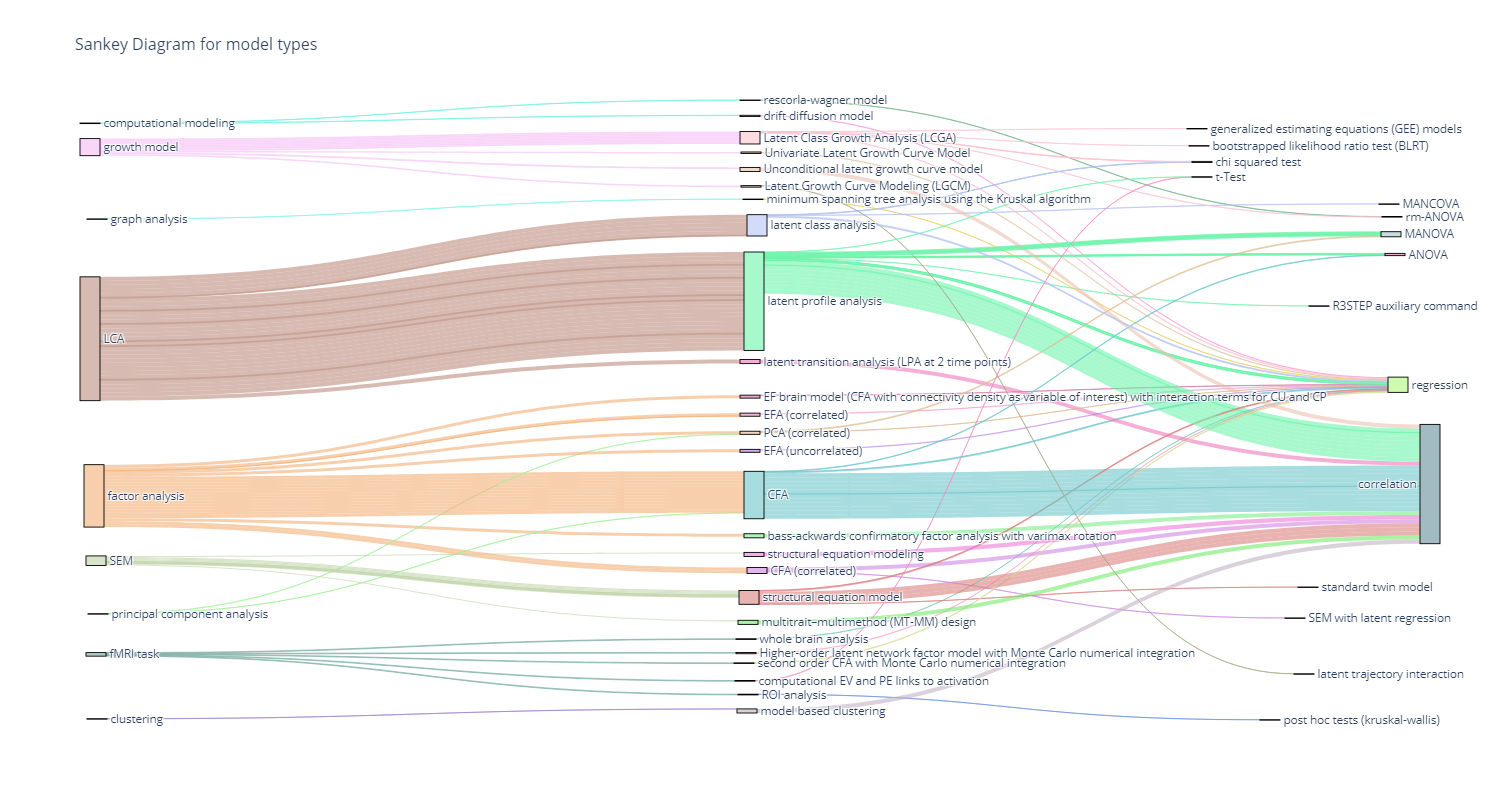

The rest of the sankeys I will make for a website that I host on github or smth. I want to move on to a little content analysis yay! the most common thing was LCA specifically LPA. let's have a closer look at those studies. 


In [ ]:
df['general_model'].value_counts() # 3 studies with no model data

general_model
latent class analysis                                                          29
factor analysis                                                                15
growth model                                                                   11
structural equation modeling                                                    8
fMRI task                                                                       5
factor analysis; latent class analysis                                          4
computational modeling                                                          2
graph analysis                                                                  1
principal component analysis; factor analysis; latent class analysis            1
factor analysis; principal component analysis; structural equation modeling     1
factor analysis; structural equation modeling; latent class analysis            1
clustering                                                                      1
Na

In [ ]:
#select all cases of the general model that contain 'latent class analysis'
df_lca = df[df['general_model'].str.contains('latent class analysis', na=False)]
df_lca['general_model'].value_counts() # 3 studies with no model data

general_model
latent class analysis                                                   29
factor analysis; latent class analysis                                   4
principal component analysis; factor analysis; latent class analysis     1
factor analysis; structural equation modeling; latent class analysis     1
Name: count, dtype: int64

In [ ]:
df_lca['assessment_tool'].value_counts() # 3 studies with no model data

assessment_tool
Inventory of Callous-Unemotional Traits (ICU)                                                                            7
Psychopathy Checklist: Revised (PCL-R)                                                                                   6
Youth Psychopathic Traits Inventory (YPI)                                                                                4
Levenson Self Report Psychopathy Rating scale (LSRP)                                                                     3
Psychopathy Checklist: Revised (PCL-R); Self Report Psychopathy Scale (SRP)                                              2
Child Problematic Traits Inventory (CPTI)                                                                                2
Antisocial Process Screening Device (APSD)                                                                               1
ABCD cu trait scale (SDQ/CBCL)                                                                                           1


In [ ]:
#explode the assessment tool to get the different variables in the same column, stripping unnecessary spaces
#df_lca['assessment_tool'] = df_lca['assessment_tool'].str.replace(' ', '') # remove spaces
#df_lca['assessment_tool'] = df_lca['assessment_tool'].str.split(';')
#df_lca_exploded = df_lca.explode('assessment_tool')
df_lca_exploded['assessment_tool'].value_counts() 


C:\Users\U727148\AppData\Local\Temp\ipykernel_37752\679085752.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



assessment_tool
Psychopathy Checklist: Revised (PCL-R)                      9
Inventory of Callous-Unemotional Traits (ICU)               7
Youth Psychopathic Traits Inventory (YPI)                   4
 Self Report Psychopathy Scale (SRP)                        3
Levenson Self Report Psychopathy Rating scale (LSRP)        3
Child Problematic Traits Inventory (CPTI)                   2
 Psychopathic Personality Inventory (PPI)                   1
ABCD cu trait scale (SDQ/CBCL)                              1
Antisocial Process Screening Device (APSD)                  1
Proposed Specifiers for Conduct Disorder Scale (PSDC)       1
Child Psychopathy Scale (CPS)                               1
 Inventory of Callous-Unemotional Traits (ICU)              1
Dark Triad Dirty Dozen                                      1
Psychopathic Personality Inventory (PPI)                    1
Self Report Psychopathy Scale (SRP)                         1
Psychopathic Personality Traits Scale (PPTS)          

<Axes: xlabel='gender_percent_female', ylabel='Count'>

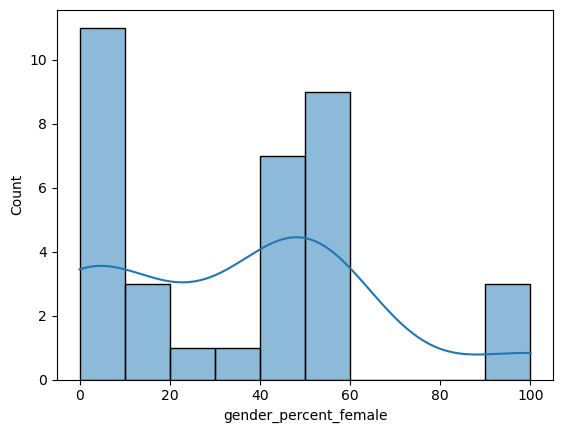

In [ ]:
#making a histogram of gender distribution  
sns.histplot(data=df_lca['gender_percent_female'], bins=10, kde=True)

In [ ]:
# REad in LCA outcomes
df_lca_outcomes = pd.read_excel('LCA_outcomes.xlsx')

In [ ]:
df_lca_outcomes['solution (no. of groups and distribution)'].value_counts()

solution (no. of groups and distribution)
4    15
3    11
5     7
2     2
0     1
Name: count, dtype: int64

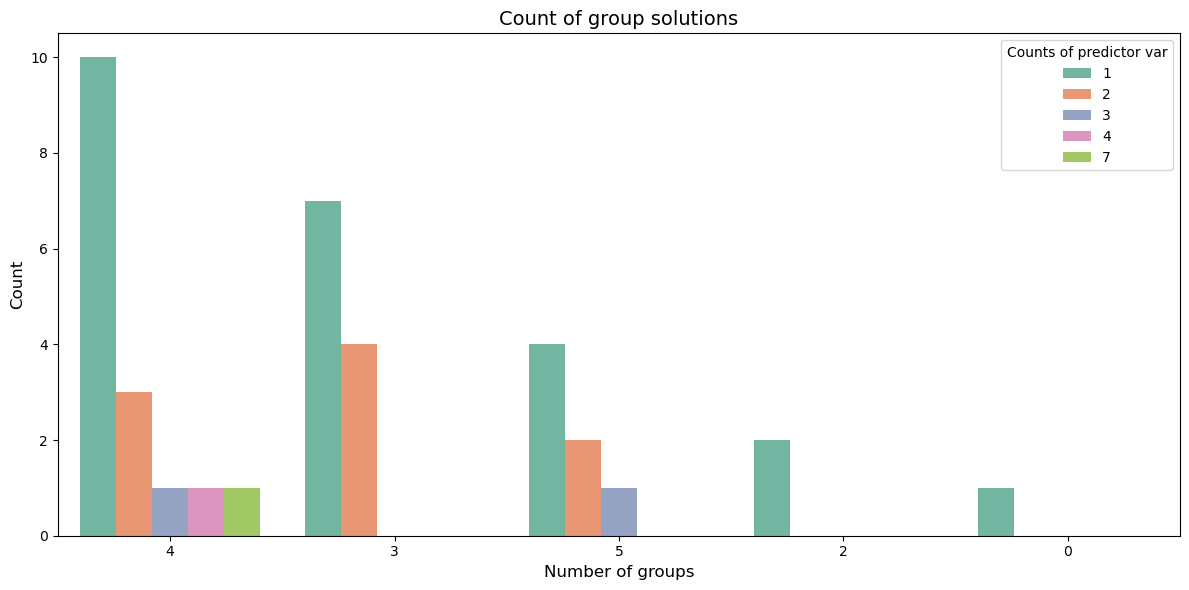

In [ ]:
#MAKE A barplot of the group solutions stacked by institutional sample

# Simple countplot of the regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_lca_outcomes, x='solution (no. of groups and distribution)', order=df_lca_outcomes['solution (no. of groups and distribution)'].value_counts().index, hue=df_lca_outcomes['number_of_predictors'], palette='Set2')

# Add title and axis labels
plt.title('Count of group solutions', fontsize=14)
plt.xlabel('Number of groups', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove grid for a cleaner look
plt.grid(False)

# Get region counts
#institution_counts = df_lca_outcomes['institutional_sample'].value_counts()


# Create custom legend labels
#legend_labels = [f"{region}: {count}" for region, count in zip(region_counts.index, region_counts.values)]

# Add legend
plt.legend(fontsize=10, title='Counts of predictor var', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the pl
plt.show()


In [ ]:
#subsetting for all studies with 4 groups
df_lca_outcomes['number_of_predictors'].value_counts() # 3 studies with no model data

number_of_predictors
1    24
2     9
3     2
7     1
4     1
Name: count, dtype: int64

In [ ]:
four

,nameyear,region,age_mean,sample size,gender distr. (% f),psychopathic or CU trait,predictor (Scale),Unnamed: 7,predictor (additional variables),outcome variables,model,solution (no. of groups and distribution),group names,comments
